In [1]:
# Load the library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 12.0
plt.rcParams['axes.titlesize'] = 14.0
plt.rcParams['xtick.labelsize'] = 12.0
plt.rcParams['ytick.labelsize'] = 12.0
plt.rcParams['legend.fontsize'] = 12.0
plt.style.use('ggplot')
from matplotlib.pyplot import *
from ggplot import *
%matplotlib inline
import datetime

/Users/arthur/anaconda/lib/python3.6/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/Users/arthur/anaconda/lib/python3.6/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
/Users/arthur/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# Read the data in

dunnhumby_data = pd.read_csv("clean_final_d_set.csv", encoding='latin1')
dunnhumby_data.head()

,Unnamed: 0,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,3,13,29273120444,171,829197,3,11.97,323,0.00,908,25,0.00,0.00,1208,GROCERY,National,ISOTONIC DRINKS,ISOTONIC DRINKS SINGLE SERVE,6PK/20 OZ
1,4,13,29033980118,155,829197,1,3.50,323,-0.49,644,23,0.00,0.00,1208,GROCERY,National,ISOTONIC DRINKS,ISOTONIC DRINKS SINGLE SERVE,6PK/20 OZ
2,5,13,29353251079,179,848154,2,2.00,323,-0.38,1104,26,0.00,0.00,69,GROCERY,Private,FRZN VEGETABLE/VEG DSH,FRZN BAGGED VEGETABLES - PLAIN,16 OZ
3,6,13,28282413676,108,848154,3,3.00,323,-0.57,1809,16,0.00,0.00,69,GROCERY,Private,FRZN VEGETABLE/VEG DSH,FRZN BAGGED VEGETABLES - PLAIN,16 OZ
4,7,13,29353251079,179,828055,1,2.04,323,-0.60,1104,26,-0.25,-0.25,720,GROCERY,National,DISHWASH DETERGENTS,LIQUID DISH DETERGENT,25 OZ


In [3]:
# Create new column called order_hour_of_day from TRANS_TIME column
hour_of_day = []
# Checking if all times converted
print(len(dunnhumby_data['TRANS_TIME']))
for x in dunnhumby_data['TRANS_TIME']:
    # If TRANS_TIME is 908, time_string is 9:08
    if len(str(x)) == 3:
        time_string = str(x)[:1] + ':' + str(x)[1:]
    # If TRANS_TIME is 1008, time_string is 10:08
    elif len(str(x)) == 4:
        time_string = str(x)[:2] + ':' + str(x)[2:]
    # TRANS_TIME is 9, add :00 to match other TRANS_TIME formats
    else:
        time_string == str(x)[:1] + ':00'
    hour_of_day.append(int(datetime.datetime.strptime(time_string,'%H:%M').strftime('%H')))
    
# Checking if all times converted
print(len(hour_of_day))

se = pd.Series(hour_of_day)
dunnhumby_data['order_hour_of_day'] = se.values

18552
18552


In [5]:
dunnhumby_data.head()

,Unnamed: 0,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT,order_hour_of_day
0,3,13,29273120444,171,829197,3,11.97,323,0.00,908,25,0.00,0.00,1208,GROCERY,National,ISOTONIC DRINKS,ISOTONIC DRINKS SINGLE SERVE,6PK/20 OZ,9
1,4,13,29033980118,155,829197,1,3.50,323,-0.49,644,23,0.00,0.00,1208,GROCERY,National,ISOTONIC DRINKS,ISOTONIC DRINKS SINGLE SERVE,6PK/20 OZ,6
2,5,13,29353251079,179,848154,2,2.00,323,-0.38,1104,26,0.00,0.00,69,GROCERY,Private,FRZN VEGETABLE/VEG DSH,FRZN BAGGED VEGETABLES - PLAIN,16 OZ,11
3,6,13,28282413676,108,848154,3,3.00,323,-0.57,1809,16,0.00,0.00,69,GROCERY,Private,FRZN VEGETABLE/VEG DSH,FRZN BAGGED VEGETABLES - PLAIN,16 OZ,18
4,7,13,29353251079,179,828055,1,2.04,323,-0.60,1104,26,-0.25,-0.25,720,GROCERY,National,DISHWASH DETERGENTS,LIQUID DISH DETERGENT,25 OZ,11


# How does order amount differ throughout the day?


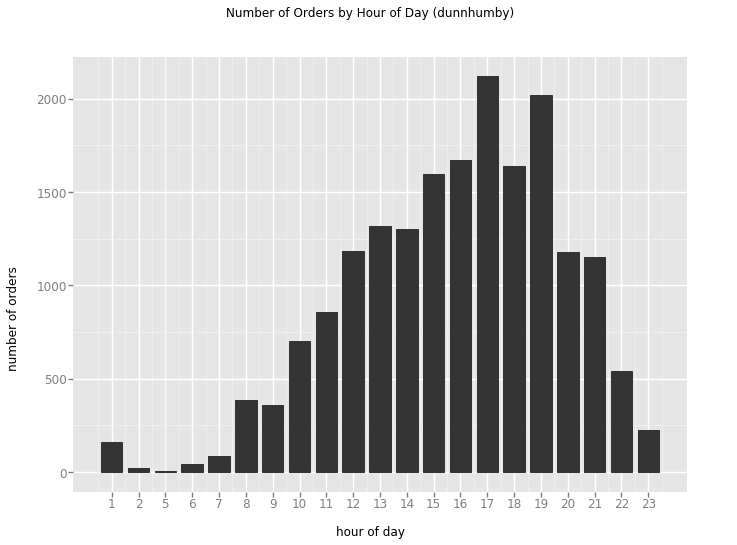

<ggplot: (-9223372036565568715)>

In [6]:
p = ggplot(aes(x='order_hour_of_day'), data=dunnhumby_data) + geom_bar()
p + labs(x = "hour of day", y = "number of orders", title = "Number of Orders by Hour of Day (dunnhumby)")

# How does number of items in cart vary by parts of the day?


In [50]:
# Create new dataframe, called order_num, with BASKET_ID and total count of items in basket
order_num = pd.Series.to_frame(dunnhumby_data.groupby(['BASKET_ID'], sort=False)['QUANTITY'].count())
order_num.head() # Check if dataframe grouping worked

,QUANTITY
BASKET_ID,
29273120444,33
29033980118,10
29353251079,18
28282413676,13
27529481842,21


In [26]:
# See how number of total items in the cart varies
order_num.describe()

,QUANTITY
count,1770.00
mean,10.48
std,12.96
min,1.00
25%,2.00
50%,6.00
75%,13.00
max,99.00


In [29]:
# Get hours of the day from dunnhumby_data
dunnhumby_data['order_hour_of_day'].drop_duplicates().sort_values()

584      1
810      2
6192     5
1        6
729      7
20       8
0        9
33      10
2       11
11      12
9       13
5       14
14      15
12      16
16      17
3       18
7       19
13      20
22      21
35      22
30      23
Name: order_hour_of_day, dtype: int64

In [4]:
# Peak hours: 4pm, 5pm, 7pm
# What are average cart sizes for peak hours compared to regular hours?
order_hour_of_day_list = [1,2,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
data_to_plot = []

# Calculate median, max, min and spread values for boxplot 
def calc_boxplot_val(hourofday):
    # Locate rows for orders made during hourofday
    locate_rows = dunnhumby_data.loc[dunnhumby_data['order_hour_of_day'] == hourofday]
    # Create a new dataframe with total number of items for every BASKET_ID
    find_total_items = pd.Series.to_frame(locate_rows.groupby(['BASKET_ID'], sort=False)['QUANTITY'].count())
    pd.options.display.float_format = '{:.2f}'.format
    center = find_total_items['QUANTITY'].median()
    high = find_total_items['QUANTITY'].max()
    low = find_total_items['QUANTITY'].min()
    spread = high-low
    data = [spread, center, high, low]
    data_to_plot.append(data)

# Apply calc_boxplot_val to all hours of the day
data_to_plot_list = list(map(calc_boxplot_val,order_hour_of_day_list))    


In [5]:
# Making sure data_to_plot list length contains all hours
len(data_to_plot)

21

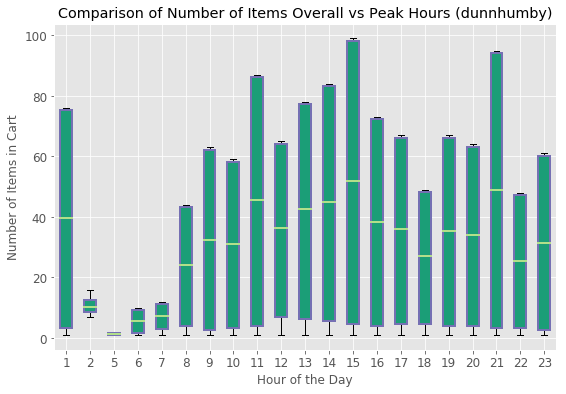

In [6]:
# Boxplot

# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data_to_plot, patch_artist=True)

# change outline color, fill color and linewidth of the boxes
for box in bp['boxes']:
    # change outline color
    box.set( color='#7570b3', linewidth=2)
    # change fill color
    box.set( facecolor = '#1b9e77' )

# change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=2)
    
# Custom x-axis labels
ax.set_xticklabels(['1','2','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20',\
                   '21','22','23'])

ax.set_title('Comparison of Number of Items Overall vs Peak Hours (dunnhumby)')
ax.set_xlabel('Hour of the Day')
ax.set_ylabel('Number of Items in Cart')


In [34]:
# Checking on results
locate_15 = dunnhumby_data.loc[dunnhumby_data['order_hour_of_day'] == 15]
find_total_items = pd.Series.to_frame(locate_15.groupby(['BASKET_ID'], sort=False)['QUANTITY'].count())
pd.options.display.float_format = '{:.2f}'.format
find_total_items.describe()

,QUANTITY
count,141.00
mean,11.33
std,14.22
min,1.00
25%,3.00
50%,6.00
75%,15.00
max,99.00


In [40]:
dunnhumby_data.loc[dunnhumby_data['order_hour_of_day'] == 21]['household_key'].drop_duplicates().count()

46

In [14]:
# Cut dataset by 6-hour periods into different parts of the day 
ranges = np.array([0, 6, 12, 18, 24], dtype=np.int64)
#ranges = [0.0, 6.0, 12.0, 18.0, 24.0]
labels = ['Early Morning', 'Morning','Early Afternoon','Evening']
dunnhumby_data['time_of_day'] = pd.cut(dunnhumby_data.order_hour_of_day, ranges, labels=labels).astype('category')
pd.options.display.float_format = '{:.2f}'.format

In [15]:
dunnhumby_data.time_of_day.head()

0            Morning
1      Early Morning
2            Morning
3    Early Afternoon
4            Morning
Name: time_of_day, dtype: category
Categories (4, object): [Early Afternoon < Early Morning < Evening < Morning]

In [16]:
dunnhumby_data['time_of_day'].describe()

count               18552
unique                  4
top       Early Afternoon
freq                 9647
Name: time_of_day, dtype: object

In [17]:
# See number of values for each part of the day
dunnhumby_data['time_of_day'].value_counts()

Early Afternoon    9647
Evening            5115
Morning            3566
Early Morning       224
Name: time_of_day, dtype: int64

In [18]:
# Create new dataframe called new_df with BASKET_ID and time_of_day
new_df = pd.Series.to_frame(dunnhumby_data['BASKET_ID'])
new_df.columns=['BASKET_ID']
new_df['time_of_day'] =  dunnhumby_data['time_of_day']
new_df.head()

,BASKET_ID,time_of_day
0,29273120444,Morning
1,29033980118,Early Morning
2,29353251079,Morning
3,28282413676,Early Afternoon
4,29353251079,Morning


In [19]:
# Delete duplicate BASKET_IDs
new_df = new_df.drop_duplicates(['BASKET_ID'], keep='first')

new_df.head()

,BASKET_ID,time_of_day
0,29273120444,Morning
1,29033980118,Early Morning
2,29353251079,Morning
3,28282413676,Early Afternoon
5,27529481842,Early Afternoon


In [21]:
# Set index to BASKET_ID
new_df = new_df.set_index('BASKET_ID')
new_df.head(10)

,time_of_day
BASKET_ID,
29273120444,Morning
29033980118,Early Morning
29353251079,Morning
28282413676,Early Afternoon
27529481842,Early Afternoon
28788493578,Evening
28243016571,Early Afternoon
28841030596,Morning
27517200564,Morning


In [22]:
# Add total count of items in basket to new_df
new_df['number of items in cart'] = order_num

In [23]:
new_df.head()

,time_of_day,number of items in cart
BASKET_ID,,
29273120444,Morning,33
29033980118,Early Morning,10
29353251079,Morning,18
28282413676,Early Afternoon,13
27529481842,Early Afternoon,21


In [42]:
# Calculate average orders for each part of the day
order_avgs = pd.Series.to_frame(new_df.groupby(['time_of_day'], sort=False)['number of items in cart'].mean())
order_avgs.columns = ['average number of items in cart']
order_avgs


,average number of items in cart
time_of_day,
Early Afternoon,10.91
Early Morning,10.43
Evening,9.84
Morning,10.38


# If people order at meal times, how much more likely are they to order more quantities of food?


In [43]:
# Cut dataframe into standard mealtime hours
# Breakfast - 7-9am
# Lunch - 12-1pm
# Dinner - 5-7pm
meal_ranges = np.array([0, 7, 9, 12, 13, 17, 19, 24], dtype=np.int64)
meal_labels = ['Reg', 'Breakfast','Reg','Lunch', 'Reg', 'Dinner', 'Reg']

dunnhumby_data['meal_time_of_day'] = pd.cut(dunnhumby_data.order_hour_of_day, meal_ranges, labels=meal_labels).astype('category')
pd.options.display.float_format = '{:.2f}'.format

In [44]:
# Create a new dataframe, called new_meal_df, with BASKET_ID, meal_time_of_day and delete duplicate order_ids

new_meal_df = pd.Series.to_frame(dunnhumby_data['BASKET_ID'])
new_meal_df.columns=['BASKET_ID']
new_meal_df['meal_time_of_day'] =  dunnhumby_data['meal_time_of_day']
new_meal_df = new_meal_df.drop_duplicates(['BASKET_ID'], keep='first')

In [45]:
# Set BASKET_ID as index and add order_num (with total number of items per order_id) to dataframe
new_meal_df = new_meal_df.set_index('BASKET_ID')
new_meal_df['number of items in cart'] = order_num
new_meal_df.head()

,meal_time_of_day,number of items in cart
BASKET_ID,,
29273120444,Breakfast,33
29033980118,Reg,10
29353251079,Reg,18
28282413676,Dinner,13
27529481842,Reg,21


In [46]:
# Calculate averages for mealtimes of the day
mealtime_avgs = pd.Series.to_frame(new_meal_df.groupby(['meal_time_of_day'], sort=False)['number of items in cart'].mean())
mealtime_avgs.columns = ['average number of items in cart']
mealtime_avgs

,average number of items in cart
meal_time_of_day,
Breakfast,9.19
Dinner,9.96
Lunch,12.29
Reg,10.56


# Instacart classification for aisles

In [51]:
## Healthy and unhealthy food groupings

health_group = []
for food in dunnhumby_data.COMMODITY_DESC:
    #print(food)
    if food in ['APPLES','BEANS - CANNED GLASS & MW','BEEF','BERRIES','BREAD','BROCCOLI/CAULIFLOWER',
               'CANNED MILK','CARROTS','CEREAL/BREAKFAST','CHICKEN','CHICKEN/POULTRY','CITRUS',
               'COLD CEREAL','CORN','DELI MEATS','DELI SPECIALTIES (RETAIL PK)','DRIED FRUIT',
                'DRY BN/VEG/POTATO/RICE','DRY NOODLES/PASTA','EGGS','FLOUR & MEALS',
               'FLUID MILK PRODUCTS','FROZEN - BOXED(GROCERY)','FROZEN BREAD/DOUGH','FROZEN MEAT','FRUIT - SHELF STABLE',
               'FRZN FRUITS','FRZN ICE','FRZN POTATOES','FRZN VEGETABLE/VEG DSH','GRAPES','HERBS','HOT CEREAL',
               'LAMB','MEAT - MISC','MEAT - SHELF STABLE','MELONS','MILK BY-PRODUCTS','MISC. DAIRY','MUSHROOMS',
               'NUTS','OLIVES','ONIONS','ORGANICS FRUIT & VEGETABLES','PACKAGED NATURAL SNACKS','PEARS','PEPPERS-ALL',
               'PORK','POTATOES','RICE CAKES','ROLLS','SALAD BAR','SALAD MIX',
               'SALADS/DIPS','SANDWICHES','SEAFOOD - FROZEN','SEAFOOD - MISC','SEAFOOD - SHELF STABLE','SEAFOOD-FRESH','SMOKED MEATS',
               'SNACK NUTS','SOUP','SPICES & EXTRACTS','SQUASH','STONE FRUIT','TEAS','TOMATOES',
               'TROPICAL FRUIT','TURKEY','VALUE ADDED FRUIT','VALUE ADDED VEGETABLES','VEAL','VEGETABLES - ALL OTHERS',
               'VEGETABLES - SHELF STABLE','VEGETABLES SALAD','WATER','YOGURT']:
        health_group.append('healthy')
        #print('appending healthy')
        #print(health_group)
    elif food in ['BACON','BAG SNACKS','BAKED BREAD/BUNS/ROLLS','BAKED SWEET GOODS','BAKING','BAKING MIXES',
                  'BEVERAGE','BREAKFAST SAUSAGE/SANDWICHES','BREAKFAST SWEETS','BUTTER',
                  'CAKES','CANNED JUICES','CHEESE','CHIPS&SNACKS','COCOA MIXES','CONVENIENT BRKFST/WHLSM SNACKS','COOKIES',
                  'COOKIES/CONES','CRACKERS/MISC BKD FD','DINNER SAUSAGE','DRY MIX DESSERTS','FROZEN','FROZEN PIE/DESSERTS',
                  'FROZEN PIZZA','FRZN BREAKFAST FOODS','FRZN JCE CONC/DRNKS','FRZN MEAT/MEAT DINNERS',
                  'FRZN NOVELTIES/WTR ICE','HEAT/SERVE','HOT DOGS','ICE CREAM/MILK/SHERBTS','JUICE',
                  'LUNCHMEAT','MARGARINES','MOLASSES/SYRUP/PANCAKE MIXS','NON-DAIRY BEVERAGES'
                  'PIES','PNT BTR/JELLY/JAMS','POPCORN','PREPARED FOOD','PREPARED/PKGD FOODS',
                  'PROCESSED','PWDR/CRYSTL DRNK MX','REFRGRATD DOUGH PRODUCTS','REFRGRATD JUICES/DRNKS','SALD DRSNG/SNDWCH SPRD'
                  'SHORTENING/OIL','SNACKS','SNKS/CKYS/CRKR/CNDY','SOFT DRINKS','SUGARS/SWEETNERS','SWEET GOODS & SNACKS',
                  'SYRUPS/TOPPINGS','WAREHOUSE SNACKS','WATER - CARBONATED/FLVRD DRINK', 'ISOTONIC DRINKS']:
        health_group.append('unhealthy')
        #print('appending unhealthy')
        #print(health_group)
    else:
        health_group.append('')
dunnhumby_data['healthy'] = health_group 

# Order Health Composition by order_hour_of_day

In [52]:
# Create new dataframe called grouped_by_hr_dunnhumby with BASKET_ID, order_hour_of_day and healthy

grouped_by_hr_dunnhumby = dunnhumby_data[['BASKET_ID', 'order_hour_of_day','healthy']]
grouped_by_hr_dunnhumby.head()

,BASKET_ID,order_hour_of_day,healthy
0,29273120444,9,unhealthy
1,29033980118,6,unhealthy
2,29353251079,11,healthy
3,28282413676,18,healthy
4,29353251079,11,


In [53]:
# Calculate percentage of healthy, unhealthy and na for each BASKET_ID

healthy_list = []
unhealthy_list = []
na_list = []
graphed_list = []
def add_healthy_count(basketid):
    if basketid not in graphed_list:
        # print('basketid: ' + str(basketid))
        total = (grouped_by_hr_dunnhumby.loc[(grouped_by_hr_dunnhumby["BASKET_ID"] == basketid)].count())['BASKET_ID']
        healthy_count = (grouped_by_hr_dunnhumby.loc[(grouped_by_hr_dunnhumby["healthy"] == 'healthy') & \
                                               (grouped_by_hr_dunnhumby["BASKET_ID"] == basketid)].count())['healthy']
        healthy_list.append((healthy_count/total)*100)
       # print('healthy count: ' + str(healthy_count))
        unhealthy_count = (grouped_by_hr_dunnhumby.loc[(grouped_by_hr_dunnhumby["healthy"] == 'unhealthy') & \
                                                 (grouped_by_hr_dunnhumby["BASKET_ID"] == basketid)].count())['healthy']
        unhealthy_list.append((unhealthy_count/total)*100)
       # print('unhealthy count: ' + str(unhealthy_count))
        na_count = (grouped_by_hr_dunnhumby.loc[(grouped_by_hr_dunnhumby["healthy"] == '') &\
                                          (grouped_by_hr_dunnhumby["BASKET_ID"] == basketid)].count())['healthy']
        na_list.append((na_count/total)*100)
        graphed_list.append(basketid)

grouped_by_hr_dunnhumby['BASKET_ID'].map(add_healthy_count)

0        None
1        None
2        None
3        None
4        None
5        None
6        None
7        None
8        None
9        None
10       None
11       None
12       None
13       None
14       None
15       None
16       None
17       None
18       None
19       None
20       None
21       None
22       None
23       None
24       None
25       None
26       None
27       None
28       None
29       None
         ... 
18522    None
18523    None
18524    None
18525    None
18526    None
18527    None
18528    None
18529    None
18530    None
18531    None
18532    None
18533    None
18534    None
18535    None
18536    None
18537    None
18538    None
18539    None
18540    None
18541    None
18542    None
18543    None
18544    None
18545    None
18546    None
18547    None
18548    None
18549    None
18550    None
18551    None
Name: BASKET_ID, Length: 18552, dtype: object

In [54]:
# Delete duplicate BASKET_IDs from dataframe
grouped_by_hr_dunnhumby = grouped_by_hr_dunnhumby.drop_duplicates(['BASKET_ID'], keep='first')

In [55]:
# Add percentage of healthy, unhealthy and na items as new columns to dataframe
grouped_by_hr_dunnhumby['healthy'] = healthy_list
grouped_by_hr_dunnhumby['unhealthy'] = unhealthy_list
grouped_by_hr_dunnhumby['na'] = na_list

In [56]:
grouped_by_hr_dunnhumby.head()

,BASKET_ID,order_hour_of_day,healthy,unhealthy,na
0,29273120444,9,51.52,27.27,21.21
1,29033980118,6,20.00,80.00,0.00
2,29353251079,11,44.44,27.78,27.78
3,28282413676,18,76.92,23.08,0.00
5,27529481842,14,47.62,33.33,19.05


In [57]:
del grouped_by_hr_dunnhumby['BASKET_ID']

In [58]:
# Create new dataframe called order_health_mean, grouped by 'order_hour_of_day' and column of mean percentage values
order_health_mean = grouped_by_hr_dunnhumby.groupby('order_hour_of_day').mean()

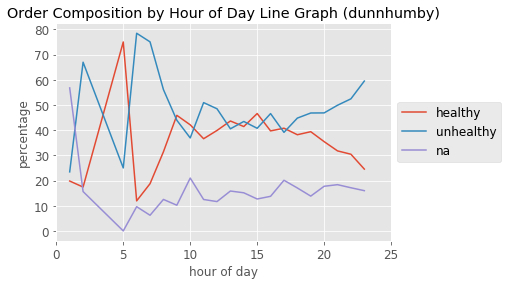

In [59]:
# Plot
health_plot = order_health_mean.plot.line(title = 'Order Composition by Hour of Day Line Graph (dunnhumby)')
health_plot.set_ylabel('percentage')
health_plot.set_xlabel('hour of day')
ticks = [0.,   5.,  10.,  15.,  20.,  25.]
health_plot.set_xticks(ticks)
health_plot.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))


In [60]:
order_health_mean.describe()

,healthy,unhealthy,na
count,21.00,21.00,21.00
mean,35.74,48.37,15.88
std,13.43,13.67,10.50
min,11.92,23.44,0.00
25%,30.44,40.74,12.48
50%,38.18,46.80,15.13
75%,41.43,52.43,17.13
max,75.00,78.46,56.76


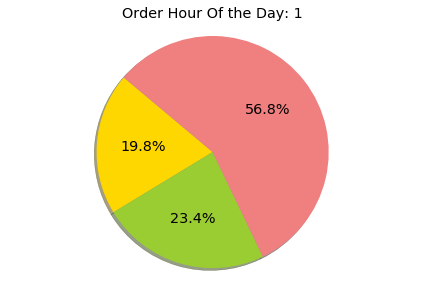

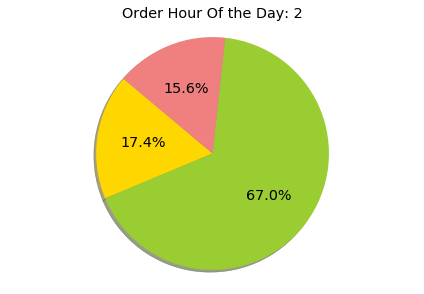

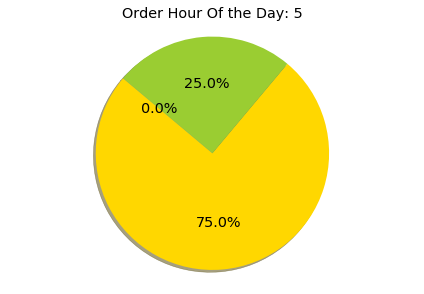

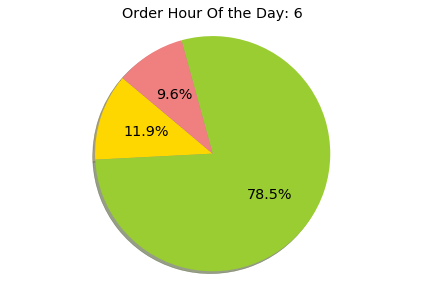

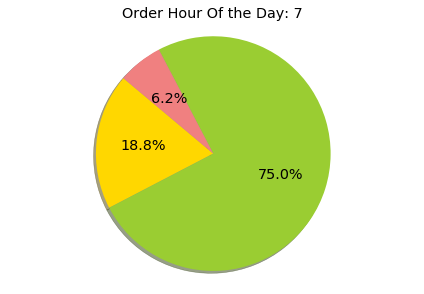

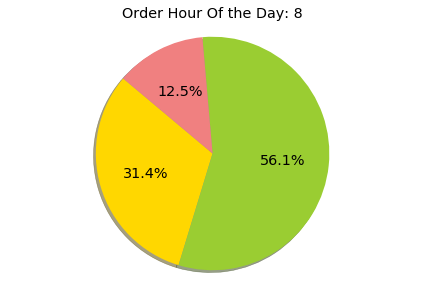

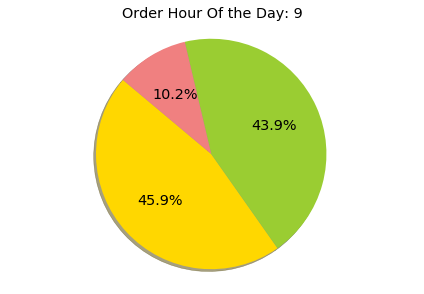

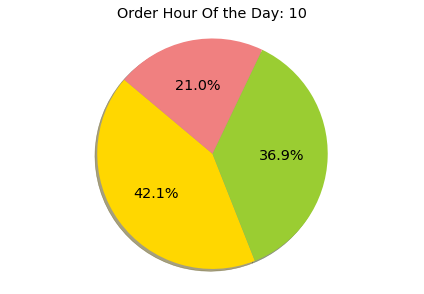

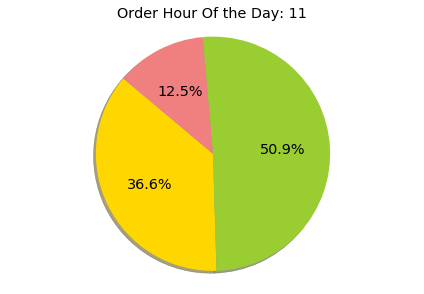

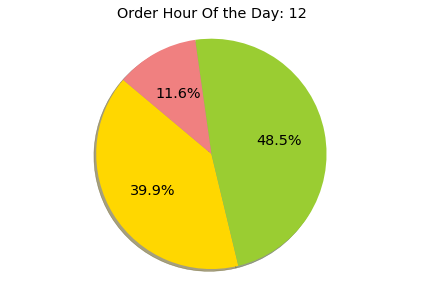

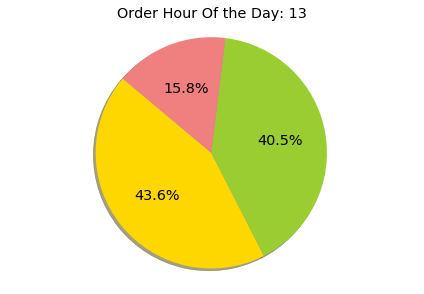

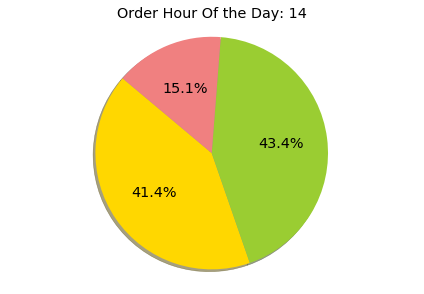

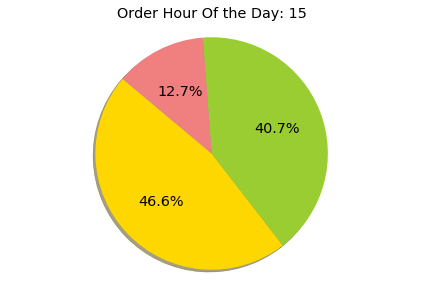

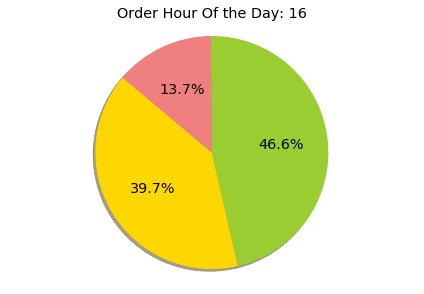

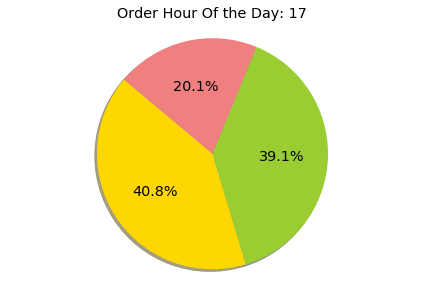

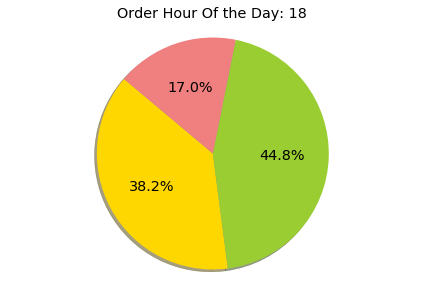

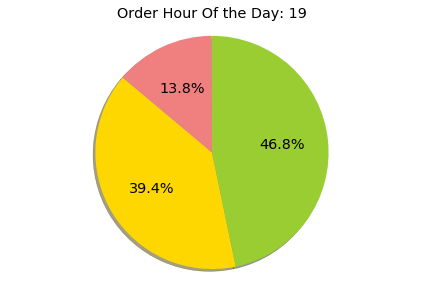

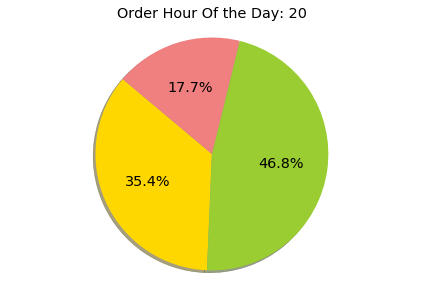

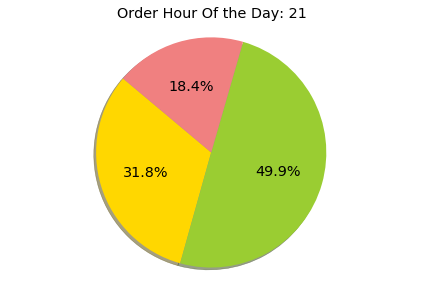

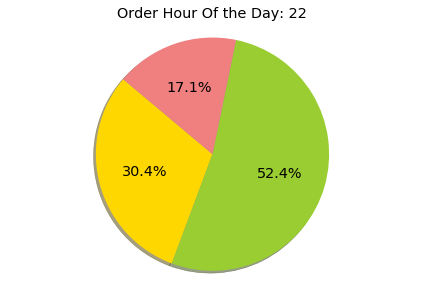

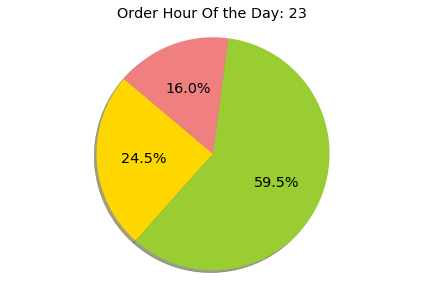

In [48]:
# Create pie charts for each hour of the day for a closer look at percentages

for index, row in order_health_mean.iterrows():
    perc_breakdown = [row['healthy'], row['unhealthy'], row['na']]
    labels = 'healthy', 'unhealthy', 'na'
    colors = ['gold', 'yellowgreen', 'lightcoral']
 
    # Plot
    patches, texts, autotexts = plt.pie(perc_breakdown, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
    for t in autotexts:
        t.set_size('x-large')
    #plt.legend(patches, labels, loc=3)
    plt.tight_layout()
    plt.title('Order Hour Of the Day: ' + str(index))
    # Set aspect ratio to be equal so that pie is drawn as a circle.
    plt.axis('equal')
    plt.show()

In [45]:
# Find Top 10 order_hour_of_days with highest healthy %
grouped_by_hr_dunnhumby.groupby('order_hour_of_day').mean().sort_values('healthy', ascending = False).head(10)

,healthy,unhealthy,na
order_hour_of_day,,,
5,75.000000,25.000000,0.000000
15,46.593402,40.737161,12.669437
9,45.874575,43.925754,10.199670
13,43.631659,40.533159,15.835182
10,42.108920,36.906564,20.984515
14,41.427086,43.443194,15.129721
17,40.771891,39.124193,20.103916
12,39.876285,48.480287,11.643428
16,39.697167,46.567251,13.735581


In [40]:
# Find Top 10 order_hour_of_days with highest unhealthy %
grouped_by_hr_dunnhumby.groupby('order_hour_of_day').mean().sort_values('unhealthy', ascending = False).head(10)

,healthy,unhealthy,na
order_hour_of_day,,,
6,11.923077,78.461538,9.615385
7,18.750000,75.034722,6.215278
2,17.410714,66.964286,15.625000
23,24.541354,59.481541,15.977105
8,31.407377,56.095534,12.497088
22,30.437398,52.431333,17.131269
11,36.593808,50.931133,12.475059
21,31.762421,49.881396,18.356183
12,39.876285,48.480287,11.643428


# Order Food Category Composition by user with order_hour_of_day

In [22]:
## Food Category Groupings

food_group = []
for food in dunnhumby_data.COMMODITY_DESC:
    if food in ['BEERS/ALES','DOMESTIC WINE','IMPORTED WINE','LIQUOR','MISC WINE']:
        food_group.append('alcohol')
    elif food in ['BAKED BREAD/BUNS/ROLLS','BREAD','CEREAL/BREAKFAST','COLD CEREAL',
                  'DRY BN/VEG/POTATO/RICE','DRY NOODLES/PASTA','FLOUR & MEALS','FROZEN BREAD/DOUGH',
                 'HOT CEREAL','RICE CAKES','ROLLS']:
        food_group.append('bread,cereal,rice,pasta')
    elif food in ['BAKED SWEET GOODS','BAKING','BAKING MIXES','BAKERY PARTY TRAYS','BREAKFAST SWEETS','BUTTER',
                 'CAKES','CANNED JUICES','COCOA MIXES','COOKIES','COOKIES/CONES',
                 'DRY MIX DESSERTS','FROZEN PIE/DESSERTS','FRZN JCE CONC/DRNKS','ICE CREAM/MILK/SHERBTS',
                 'JUICE','MARGARINES','MOLASSES/SYRUP/PANCAKE MIXS','PIES','PNT BTR/JELLY/JAMS',
                 'PWDR/CRYSTL DRNK MX','REFRGRATD DOUGH PRODUCTS','REFRGRATD JUICES/DRNKS',
                 'SHORTENING/OIL','SNKS/CKYS/CRKR/CNDY','SOFT DRINKS','SUGARS/SWEETNERS',
                 'SWEET GOODS & SNACKS','SYRUPS/TOPPINGS']:
        food_group.append('fats,oils,sweets, sugary drinks')
    elif food in ['APPLES','BERRIES','BROCCOLI/CAULIFLOWER','CARROTS','CITRUS',
                 'CORN','DRIED FRUIT','FROZEN - BOXED(GROCERY)','FRUIT - SHELF STABLE','FRZN FRUITS',
                 'FRZN POTATOES','FRZN VEGETABLE/VEG DSH','GRAPES','HERBS','MELONS',
                 'MUSHROOMS','OLIVES','ONIONS','ORGANICS FRUIT & VEGETABLES','PEARS',  
                 'PEPPERS-ALL','PICKLE/RELISH/PKLD VEG','POTATOES','SALAD BAR','SALAD MIX',
                 'SQUASH','STONE FRUIT','TOMATOES','TROPICAL FRUIT','VALUE ADDED FRUIT',
                 'VALUE ADDED VEGETABLES','VEGETABLES - ALL OTHERS','VEGETABLES - SHELF STABLE',                   
                 'VEGETABLES SALAD']:
        food_group.append('fruits/vegetables')
    elif food in ['BACON','BEANS - CANNED GLASS & MW','BEEF','CHICKEN','CHICKEN/POULTRY',
                 'DELI MEATS','DELI SPECIALTIES (RETAIL PK)','DINNER SAUSAGE','EGGS','FROZEN MEAT',
                 'HOT DOGS','LAMB','LUNCHMEAT','MEAT - MISC','MEAT - SHELF STABLE',
                 'NUTS','PORK','SEAFOOD - FROZEN','SEAFOOD - MISC','SEAFOOD - SHELF STABLE',
                 'SEAFOOD-FRESH','SMOKED MEATS','SNACK NUTS','TURKEY','VEAL','EXOTIC GAME/FOWL','FROZEN CHICKEN',
                  '(CORP USE ONLY)']:
        food_group.append('meat,poultry,fish,dry beans, eggs, nuts')
    elif food in ['CANNED MILK','CHEESE','CHEESES','FLUID MILK PRODUCTS','MILK BY-PRODUCTS','MISC. DAIRY',
                 'YOGURT']:
        food_group.append('milk,yogurt,cheese')
    elif food in ['AIR CARE','BATH TISSUES','BIRD SEED','BLEACH',
                  'BOTTLE DEPOSITS','CAT FOOD','CAT LITTER','DELI SUPPLIES','DINNER MXS:DRY',
                  'DISHWASH DETERGENTS','DOG FOODS','FACIAL TISS/DNR NAPKIN','FD WRAPS/BAGS/TRSH BG',
                  'FITNESS&DIET','HOUSEHOLD CLEANG NEEDS','LAUNDRY ADDITIVES','LAUNDRY DETERGENTS','NEW AGE',
                  'PAPER HOUSEWARES','PAPER TOWELS','PET CARE SUPPLIES']:
        food_group.append('non-food')
    elif food in ['BABYFOOD','COUPON/MISC ITEMS','FRZN ICE','HISPANIC','MISCELLANEOUS','PARTY TRAYS',
                  'REFRIGERATED','SANDWICHES','SOUP','SPICES & EXTRACTS','UNKNOWN']:
        food_group.append('other')   
    elif food in ['BEVERAGE','COFFEE','ISOTONIC DRINKS','NON-DAIRY BEVERAGES','TEAS',
                  'WATER','WATER - CARBONATED/FLVRD DRINK']:
        food_group.append('other beverage')
    elif food in ['BAKING NEEDS','CONDIMENTS','CONDIMENTS/SAUCES','DRY SAUCES/GRAVY','PASTA SAUCE',
                 'SALADS/DIPS','SALD DRSNG/SNDWCH SPRD','DRY TEA/COFFEE/COCO MIX']:
        food_group.append('sauces/toppings')
    elif food in ['BAG SNACKS','BREAKFAST SAUSAGE/SANDWICHES','CHIPS&SNACKS','CONVENIENT BRKFST/WHLSM SNACKS',
                 'CRACKERS/MISC BKD FD','FROZEN','FROZEN PIZZA','FRZN BREAKFAST FOODS','FRZN MEAT/MEAT DINNERS',
                 'FRZN NOVELTIES/WTR ICE','HEAT/SERVE','PACKAGED NATURAL SNACKS','POPCORN','PREPARED FOOD',
                 'PREPARED/PKGD FOODS','PROCESSED','SNACKS','WAREHOUSE SNACKS','SUSHI']:
        food_group.append('snacks/instant/frozen meal foods')
    else:
        print(food)
        food_group.append('')
dunnhumby_data['foodgroup'] = food_group

In [23]:
dunnhumby_data.head()

,Unnamed: 0,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,...,COUPON_DISC,COUPON_MATCH_DISC,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT,order_hour_of_day,foodgroup
0,3,13,29273120444,171,829197,3,11.97,323,0.00,908,...,0.00,0.00,1208,GROCERY,National,ISOTONIC DRINKS,ISOTONIC DRINKS SINGLE SERVE,6PK/20 OZ,9,other beverage
1,4,13,29033980118,155,829197,1,3.50,323,-0.49,644,...,0.00,0.00,1208,GROCERY,National,ISOTONIC DRINKS,ISOTONIC DRINKS SINGLE SERVE,6PK/20 OZ,6,other beverage
2,5,13,29353251079,179,848154,2,2.00,323,-0.38,1104,...,0.00,0.00,69,GROCERY,Private,FRZN VEGETABLE/VEG DSH,FRZN BAGGED VEGETABLES - PLAIN,16 OZ,11,fruits/vegetables
3,6,13,28282413676,108,848154,3,3.00,323,-0.57,1809,...,0.00,0.00,69,GROCERY,Private,FRZN VEGETABLE/VEG DSH,FRZN BAGGED VEGETABLES - PLAIN,16 OZ,18,fruits/vegetables
4,7,13,29353251079,179,828055,1,2.04,323,-0.60,1104,...,-0.25,-0.25,720,GROCERY,National,DISHWASH DETERGENTS,LIQUID DISH DETERGENT,25 OZ,11,non-food


In [21]:
# Check what items are under CORP USE ONLY - update food category grouping
dunnhumby_data.loc[dunnhumby_data['COMMODITY_DESC'] == '(CORP USE ONLY)']

,Unnamed: 0,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,...,COUPON_MATCH_DISC,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT,order_hour_of_day,healthy,foodgroup
3992,4545,181,29221546320,168,1093587,0,0.0,327,0.0,1525,...,0.0,4751,MEAT,National,(CORP USE ONLY),SELECT BEEF,,15,,
16144,18415,1722,27828881766,71,926775,4,4.0,296,0.0,1808,...,0.0,4750,MEAT,National,(CORP USE ONLY),SELECT BEEF,,18,,


In [24]:
# Create new dataframe, grouped_by_hr_dunnhumby2 with BASKET_ID, order_hour_of_day and foodgroup
grouped_by_hr_dunnhumby2 = dunnhumby_data[['BASKET_ID', 'order_hour_of_day','foodgroup']]


In [25]:
# Create lists of foodgroups to add to grouped_by_hr_dunnhumby2

alcohol_list = []
nonfood_list = []
fats_oils_etc = []
milk_yogurts_cheese = []
fruits_vegetables = []
meat_poultry_etc = []
bread_cereal_etc = []
sauces_toppings = []
snacks_instant = []
other_beverage = []
other_list = []

def add_food_category(orderid):
    total = (grouped_by_hr_dunnhumby2.loc[(grouped_by_hr_dunnhumby2["BASKET_ID"] == orderid)].count())['BASKET_ID']
    alc_count = (grouped_by_hr_dunnhumby2.loc[(grouped_by_hr_dunnhumby2["foodgroup"] == 'alcohol') & \
                                           (grouped_by_hr_dunnhumby2["BASKET_ID"] == orderid)].count())['foodgroup']
    alcohol_list.append((alc_count/total)*100)
   # print('alcohol count: ' + str(alc_count))
    nonfood_count = (grouped_by_hr_dunnhumby2.loc[(grouped_by_hr_dunnhumby2["foodgroup"] == 'non-food') & \
                                             (grouped_by_hr_dunnhumby2["BASKET_ID"] == orderid)].count())['foodgroup']
    nonfood_list.append((nonfood_count/total)*100)
   # print('nonfood count: ' + str(nonfood_count))
    bread_count = (grouped_by_hr_dunnhumby2.loc[(grouped_by_hr_dunnhumby2["foodgroup"] == 'bread,cereal,rice,pasta') & \
                                           (grouped_by_hr_dunnhumby2["BASKET_ID"] == orderid)].count())['foodgroup']
    bread_cereal_etc.append((bread_count/total)*100)
    fats_count = (grouped_by_hr_dunnhumby2.loc[(grouped_by_hr_dunnhumby2["foodgroup"] == 'fats,oils,sweets, sugary drinks') & \
                                           (grouped_by_hr_dunnhumby2["BASKET_ID"] == orderid)].count())['foodgroup']
    fats_oils_etc.append((fats_count/total)*100)
    fruits_count = (grouped_by_hr_dunnhumby2.loc[(grouped_by_hr_dunnhumby2["foodgroup"] == 'fruits/vegetables') & \
                                           (grouped_by_hr_dunnhumby2["BASKET_ID"] == orderid)].count())['foodgroup']
    fruits_vegetables.append((fruits_count/total)*100)

    meats_count = (grouped_by_hr_dunnhumby2.loc[(grouped_by_hr_dunnhumby2["foodgroup"] == 'meat,poultry,fish,dry beans, eggs, nuts') & \
                                           (grouped_by_hr_dunnhumby2["BASKET_ID"] == orderid)].count())['foodgroup']
    meat_poultry_etc.append((meats_count/total)*100)

    dairy_count = (grouped_by_hr_dunnhumby2.loc[(grouped_by_hr_dunnhumby2["foodgroup"] == 'milk,yogurt,cheese') & \
                                           (grouped_by_hr_dunnhumby2["BASKET_ID"] == orderid)].count())['foodgroup']
    milk_yogurts_cheese.append((dairy_count/total)*100)

    other_count = (grouped_by_hr_dunnhumby2.loc[(grouped_by_hr_dunnhumby2["foodgroup"] == 'other') & \
                                           (grouped_by_hr_dunnhumby2["BASKET_ID"] == orderid)].count())['foodgroup']
    other_list.append((other_count/total)*100)

    other_bev_count = (grouped_by_hr_dunnhumby2.loc[(grouped_by_hr_dunnhumby2["foodgroup"] == 'other beverage') & \
                                           (grouped_by_hr_dunnhumby2["BASKET_ID"] == orderid)].count())['foodgroup']
    other_beverage.append((other_bev_count/total)*100)

    sauce_count = (grouped_by_hr_dunnhumby2.loc[(grouped_by_hr_dunnhumby2["foodgroup"] == 'sauces/toppings') & \
                                           (grouped_by_hr_dunnhumby2["BASKET_ID"] == orderid)].count())['foodgroup']
    sauces_toppings.append((sauce_count/total)*100)

    snack_count = (grouped_by_hr_dunnhumby2.loc[(grouped_by_hr_dunnhumby2["foodgroup"] == 'snacks/instant/frozen meal foods') & \
                                           (grouped_by_hr_dunnhumby2["BASKET_ID"] == orderid)].count())['foodgroup']
    snacks_instant.append((snack_count/total)*100)

grouped_by_hr_dunnhumby2['BASKET_ID'].map(add_food_category)

0        None
1        None
2        None
3        None
4        None
5        None
6        None
7        None
8        None
9        None
10       None
11       None
12       None
13       None
14       None
15       None
16       None
17       None
18       None
19       None
20       None
21       None
22       None
23       None
24       None
25       None
26       None
27       None
28       None
29       None
         ... 
18522    None
18523    None
18524    None
18525    None
18526    None
18527    None
18528    None
18529    None
18530    None
18531    None
18532    None
18533    None
18534    None
18535    None
18536    None
18537    None
18538    None
18539    None
18540    None
18541    None
18542    None
18543    None
18544    None
18545    None
18546    None
18547    None
18548    None
18549    None
18550    None
18551    None
Name: BASKET_ID, Length: 18552, dtype: object

In [30]:
# Add new food group columns to grouped_by_hr_dunnhumby2

grouped_by_hr_dunnhumby2['alcohol'] = alcohol_list
grouped_by_hr_dunnhumby2['nonfood'] = nonfood_list
grouped_by_hr_dunnhumby2['fats,oils,sweets'] = fats_oils_etc
grouped_by_hr_dunnhumby2['milk,yogurts,cheese'] = milk_yogurts_cheese
grouped_by_hr_dunnhumby2['fruits/vegetables'] = fruits_vegetables
grouped_by_hr_dunnhumby2['meat,poultry,etc'] = meat_poultry_etc
grouped_by_hr_dunnhumby2['bread,cereal'] = bread_cereal_etc
grouped_by_hr_dunnhumby2['sauces/toppings'] = sauces_toppings
grouped_by_hr_dunnhumby2['snacks/instant food'] = snacks_instant
grouped_by_hr_dunnhumby2['other beverage'] = other_beverage
grouped_by_hr_dunnhumby2['other'] = other_list

/Users/arthur/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/arthur/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/arthur/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

In [31]:
# Check what grouped_by_hr_dunnhumby2 currently looks like

grouped_by_hr_dunnhumby2.head()

,order_hour_of_day,foodgroup,alcohol,nonfood,"fats,oils,sweets","milk,yogurts,cheese",fruits/vegetables,"meat,poultry,etc","bread,cereal",sauces/toppings,snacks/instant food,other beverage,other
0,9,other beverage,6.060606,9.090909,9.090909,18.181818,15.151515,21.212121,0.000000,6.060606,6.060606,6.060606,3.030303
1,6,other beverage,0.000000,0.000000,10.000000,20.000000,0.000000,0.000000,0.000000,0.000000,60.000000,10.000000,0.000000
2,11,fruits/vegetables,0.000000,22.222222,22.222222,11.111111,27.777778,0.000000,5.555556,5.555556,5.555556,0.000000,0.000000
3,18,fruits/vegetables,0.000000,0.000000,7.692308,15.384615,53.846154,15.384615,7.692308,0.000000,0.000000,0.000000,0.000000
4,11,non-food,0.000000,22.222222,22.222222,11.111111,27.777778,0.000000,5.555556,5.555556,5.555556,0.000000,0.000000


In [27]:
del grouped_by_hr_dunnhumby2['BASKET_ID']

In [28]:
grouped_by_hr_dunnhumby2['foodgroup'].describe()

count                               18552
unique                                 11
top       fats,oils,sweets, sugary drinks
freq                                 3472
Name: foodgroup, dtype: object

In [32]:
# Create new dataframe called order_food_cat_mean, grouped by 'order_hour_of_day' and column of mean percentage values\
# for each food category
order_food_cat_mean = grouped_by_hr_dunnhumby2.groupby('order_hour_of_day').mean()

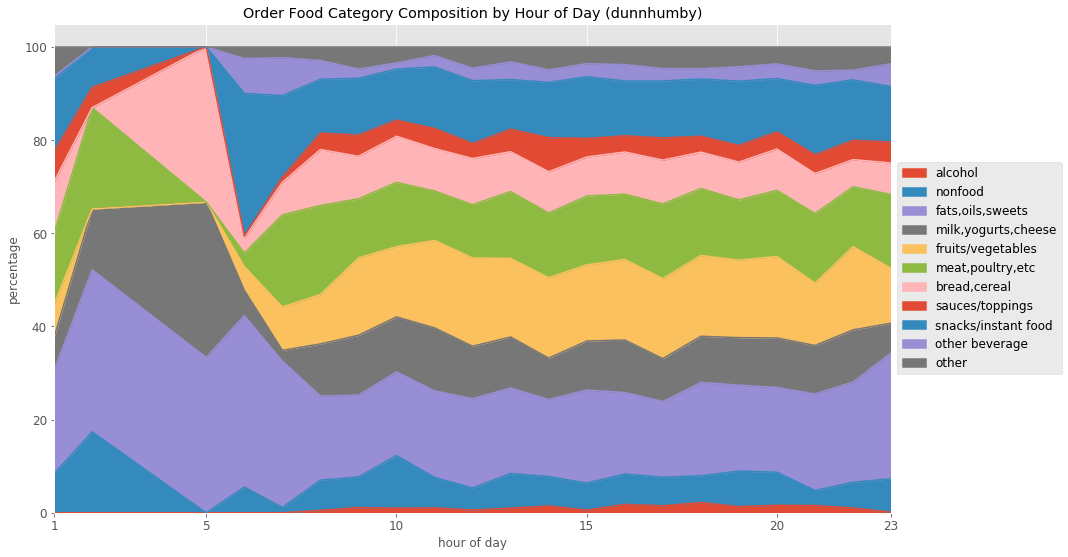

In [37]:
# Plot
food_cat_plot = order_food_cat_mean.plot.area(stacked=True, title = 'Order Food Category Composition by Hour of Day '
                                              '(dunnhumby)',figsize=(15,9), fontsize=12, legend=True)
food_cat_plot.set_ylabel('percentage')
food_cat_plot.set_xlabel('hour of day')
ticks2 = [1.,   5.,  10.,  15.,  20.,  23.]
food_cat_plot.set_xticks(ticks2)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [31]:
order_food_cat_mean

,alcohol,nonfood,"fats,oils,sweets","milk,yogurts,cheese",fruits/vegetables,"meat,poultry,etc","bread,cereal",sauces/toppings,snacks/instant food,other beverage,other
order_hour_of_day,,,,,,,,,,,
1,0.000000,8.404003,22.158134,7.101287,7.013988,15.389412,10.994367,6.453306,15.493338,0.632911,6.359253
2,0.000000,17.391304,34.782609,13.043478,0.000000,21.739130,0.000000,4.347826,8.695652,0.000000,0.000000
5,0.000000,0.000000,33.333333,33.333333,0.000000,0.000000,33.333333,0.000000,0.000000,0.000000,0.000000
6,0.000000,5.517241,36.810345,5.431034,5.086207,2.931034,3.189655,0.431034,30.603448,7.500000,2.500000
7,0.000000,1.162791,31.395349,2.325581,9.302326,19.767442,6.976744,1.162791,17.441860,8.139535,2.325581
8,0.522193,6.488401,18.059356,11.179669,10.592710,19.124867,11.997355,3.532065,11.571130,4.009658,2.922597
9,1.123596,6.547850,17.580395,12.853545,16.587563,12.713096,9.104998,4.567028,12.180356,1.966292,4.775281
10,1.000000,11.300493,17.950802,11.792039,15.077117,13.801255,9.895280,3.450103,10.972541,1.313364,3.447005
11,1.048951,6.538863,18.573668,13.529861,18.766578,10.616108,9.106985,4.322402,13.184230,2.447552,1.864802


# When do people usually reorder?


In [60]:
# Create dataframe, grouped_by_hh, with WEEK_NO and household_key and sort dataframe by household_key values

grouped_by_hh = dunnhumby_data[['household_key', 'WEEK_NO']].sort_values('household_key')
grouped_by_hh.tail()

,household_key,WEEK_NO
1373,2442,12
13096,2442,16
13101,2442,12
12138,2442,16
18551,2442,19


In [130]:
# Count number of unique household_keys
grouped_by_hh['household_key'].drop_duplicates().count()

97

In [61]:
# Averaged the differences between every week value recorded under a unique household_key
average_freq_list = []
hh_list = []
def find_reorder_frequency(householdkey):
    if householdkey not in hh_list:
        sum_of_diff = 0
        # Locate WEEK_NO value of household key and drop duplicate WEEK_NO values
        # Sort by WEEK_NO so it's in ascending order.
        hh_week_no = grouped_by_hh.loc[grouped_by_hh['household_key'] == householdkey]['WEEK_NO'].drop_duplicates().sort_values()
        hh_week_list = list(hh_week_no)
        # Subtract week value i from week value i+1
        for i in range(len(hh_week_list)-1):
            diff = hh_week_list[i+1]-hh_week_list[i]
            # sum up differences
            sum_of_diff += diff
        # Divide sum of differences by number of items in hh_week_list and append resulting average to average_freq_list
        average_freq_list.append(sum_of_diff/len(hh_week_list))
        hh_list.append(householdkey)

grouped_by_hh['household_key'].map(find_reorder_frequency)

0        None
1491     None
1493     None
1497     None
1498     None
1501     None
1503     None
1504     None
1507     None
1511     None
1513     None
1489     None
1519     None
1545     None
1548     None
1549     None
600      None
599      None
597      None
575      None
574      None
571      None
569      None
1543     None
568      None
1481     None
1478     None
1309     None
1319     None
701      None
         ... 
16709    None
17708    None
13641    None
10771    None
10764    None
10745    None
2338     None
16224    None
1542     None
10225    None
1167     None
10765    None
8935     None
6512     None
3127     None
18550    None
6050     None
9685     None
13238    None
871      None
12714    None
11545    None
16736    None
11472    None
3944     None
1373     None
13096    None
13101    None
12138    None
18551    None
Name: household_key, Length: 18552, dtype: object

In [62]:
grouped_by_hh.describe()

,household_key,WEEK_NO
count,18552.000000,18552.000000
mean,1243.566031,16.148124
std,758.025291,6.354338
min,13.000000,1.000000
25%,510.000000,11.000000
50%,1116.000000,17.000000
75%,1987.000000,21.000000
max,2442.000000,26.000000


In [63]:
# Drop duplicate household keys
grouped_by_hh = grouped_by_hh.drop_duplicates('household_key')

In [131]:
del grouped_by_hh['WEEK_NO']

In [64]:
# We then added this list of values as a new column ‘weeks_since_prior’ to a slice of the dunnhumby_data.
grouped_by_hh['weeks_since_prior'] = average_freq_list

In [139]:
grouped_by_hh.describe()

,household_key,weeks_since_prior
count,97.000000,97.000000
mean,1301.103093,1.703949
std,770.172228,1.019001
min,13.000000,0.000000
25%,546.000000,1.076923
50%,1308.000000,1.600000
75%,2029.000000,2.142857
max,2442.000000,6.000000


# Does a smaller number of days since prior order lead to less items on average in a user’s cart?

In [143]:
grouped_by_hh2 = dunnhumby_data[['household_key', 'BASKET_ID']].sort_values('household_key')


In [145]:
order_quant = pd.Series.to_frame(dunnhumby_data.groupby(['BASKET_ID'])['QUANTITY'].count())

In [146]:
order_quant.head()

,QUANTITY
BASKET_ID,
27009148326,3
27009291840,13
27021557072,33
27023506679,3
27057645650,11


In [152]:
grouped_by_hh2 = grouped_by_hh2.drop_duplicates('BASKET_ID').sort_values('BASKET_ID')
grouped_by_hh2 = grouped_by_hh2.set_index('BASKET_ID')

In [153]:
grouped_by_hh2['order amount'] = order_quant['QUANTITY']
grouped_by_hh2.head()

,household_key,order amount
BASKET_ID,,
27009148326,2044,3
27009291840,1116,13
27021557072,2018,33
27023506679,2397,3
27057645650,2263,11


In [157]:
dunnhumby_data.loc[dunnhumby_data['household_key'] == 13]

,Unnamed: 0,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,...,COUPON_MATCH_DISC,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT,order_hour_of_day,healthy,foodgroup
0,3,13,29273120444,171,829197,3,11.97,323,0.00,908,...,0.00,1208,GROCERY,National,ISOTONIC DRINKS,ISOTONIC DRINKS SINGLE SERVE,6PK/20 OZ,9,unhealthy,other beverage
1,4,13,29033980118,155,829197,1,3.50,323,-0.49,644,...,0.00,1208,GROCERY,National,ISOTONIC DRINKS,ISOTONIC DRINKS SINGLE SERVE,6PK/20 OZ,6,unhealthy,other beverage
2,5,13,29353251079,179,848154,2,2.00,323,-0.38,1104,...,0.00,69,GROCERY,Private,FRZN VEGETABLE/VEG DSH,FRZN BAGGED VEGETABLES - PLAIN,16 OZ,11,healthy,fruits/vegetables
3,6,13,28282413676,108,848154,3,3.00,323,-0.57,1809,...,0.00,69,GROCERY,Private,FRZN VEGETABLE/VEG DSH,FRZN BAGGED VEGETABLES - PLAIN,16 OZ,18,healthy,fruits/vegetables
4,7,13,29353251079,179,828055,1,2.04,323,-0.60,1104,...,-0.25,720,GROCERY,National,DISHWASH DETERGENTS,LIQUID DISH DETERGENT,25 OZ,11,,non-food
6,10,13,28282413676,108,7467039,1,2.99,323,-1.00,1809,...,0.00,1089,MEAT-PCKGD,National,DINNER SAUSAGE,SMOKED/COOKED,,18,unhealthy,"meat,poultry,fish,dry beans, eggs, nuts"
7,11,13,28788493578,141,7467039,2,5.00,323,-2.98,1934,...,0.00,1089,MEAT-PCKGD,National,DINNER SAUSAGE,SMOKED/COOKED,,19,unhealthy,"meat,poultry,fish,dry beans, eggs, nuts"
8,12,13,29273120444,171,840361,2,1.76,323,-1.02,908,...,0.00,69,GROCERY,Private,EGGS,EGGS - LARGE,1 DZ,9,healthy,"meat,poultry,fish,dry beans, eggs, nuts"
9,13,13,28243016571,104,840361,1,1.09,323,-0.30,1303,...,0.00,69,GROCERY,Private,EGGS,EGGS - LARGE,1 DZ,13,healthy,"meat,poultry,fish,dry beans, eggs, nuts"
53,57,13,28282413676,108,7410344,1,1.67,323,-0.82,1809,...,0.00,69,GROCERY,Private,FRZN VEGETABLE/VEG DSH,FRZN BAGGED VEGETABLES - PLAIN,32 OZ,18,healthy,fruits/vegetables
